In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stat
from scipy.stats import norm, gamma

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('CarSeats.csv')
data

,No,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
sales = data['Sales']
dz = pd.DataFrame({'mean': sales.mean(),
                   'std': sales.std(),
                   'var': sales.var(),
                   'skew': sales.skew()}, index=['Sales'])
dz

,mean,std,var,skew
Sales,7.496325,2.824115,7.975626,0.18556


In [ ]:
# confidence level is 95%

In [11]:
# mean
mean = data['Sales'].mean()
n = data['Sales'].count()
t = 1.962
lcb = mean - (t * (data['Sales'].std() / np.sqrt(n))) 
ucb = mean + (t * (data['Sales'].std() / np.sqrt(n))) 
(lcb, ucb)

(7.21927931371205, 7.773370686287951)

In [36]:
# var
var = data['Sales'].var()
n = data['Sales'].count()
xi2_lcb = 456.236
xi2_ucb = 345.551
var_lcb = ((n - 1) * var) / xi2_lcb
var_ucb = ((n - 1) * var) / xi2_ucb
(var_lcb, var_ucb)

(6.975062681923389, 9.209276482342691)

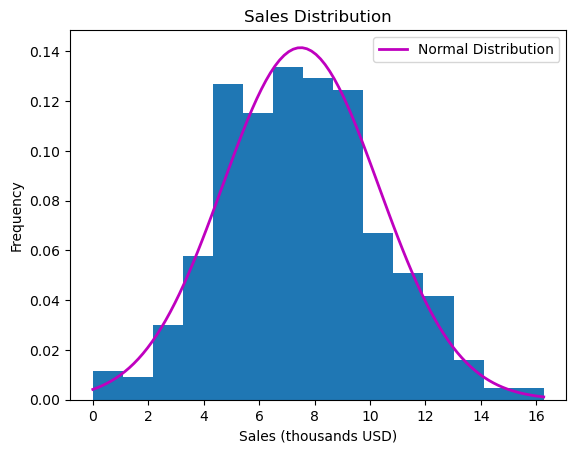

In [31]:
sales = sorted(list(data['Sales']))

plt.hist(sales, bins=15, density=True)

mu, std = np.mean(sales), np.std(sales)
x = np.linspace(min(sales), max(sales), 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'm', linewidth=2, label='Normal Distribution')

plt.title('Sales Distribution')
plt.xlabel('Sales (thousands USD)')
plt.ylabel('Frequency')

plt.legend()
plt.show()

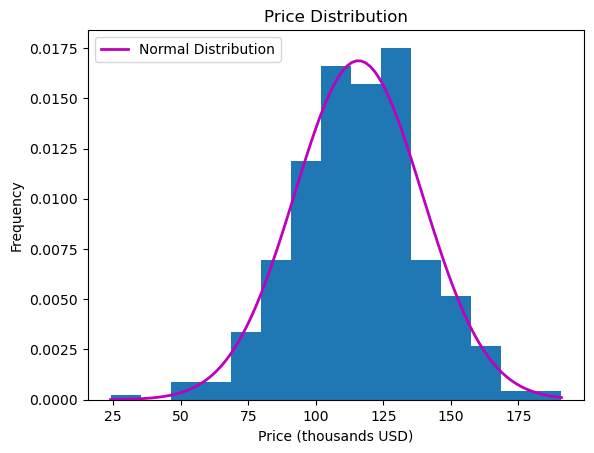

In [37]:
price = sorted(list(data['Price']))

plt.hist(price, bins=15, density=True)

mu, std = np.mean(price), np.std(price)
x = np.linspace(min(price), max(price), 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'm', linewidth=2, label='Normal Distribution')

plt.title('Price Distribution')
plt.xlabel('Price (thousands USD)')
plt.ylabel('Frequency')

plt.legend()
plt.show()

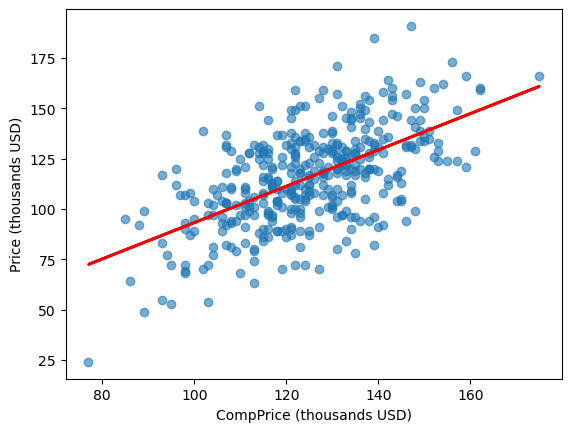

In [30]:
plt.scatter(data.CompPrice, data.Price, alpha=0.6)
plt.xlabel('CompPrice (thousands USD)')
plt.ylabel('Price (thousands USD)')

model = LinearRegression()
X = pd.DataFrame(data.CompPrice)
Y = pd.DataFrame(data.Price)
model.fit(X, Y)

plt.plot(X, model.predict(X), color='red', linewidth=2)

plt.show()

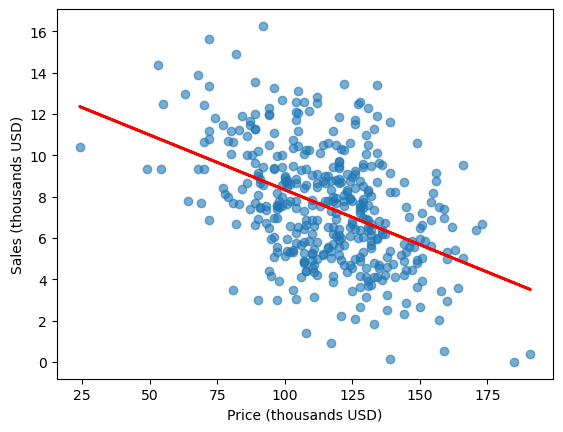

In [33]:
plt.scatter(data.Price, data.Sales, alpha=0.6)
plt.xlabel('Price (thousands USD)')
plt.ylabel('Sales (thousands USD)')

model = LinearRegression()
X = pd.DataFrame(data.Price)
Y = pd.DataFrame(data.Sales)
model.fit(X, Y)

plt.plot(X, model.predict(X), color='red', linewidth=2)

plt.show()